In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Manual Linear Regression

0.9739390052221979
M is -7.164488017429194
c is 195.14324618736384


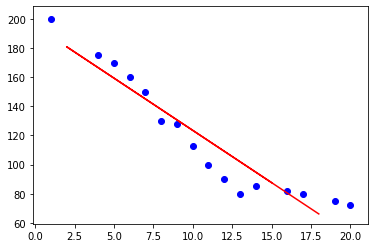

In [121]:
b = [i for i in range(1,21)]
xdata = b
ydata = [200,190,180,175,170,160,150,130,128,113,100,90,80,85,83,82,80,78,75,72]

# y = mx+c
# m = (x-xbar)(y-ybar) // (x-xbar)**2
# c = ymean - m* meanx
#r2score = 1 - ((y - ypred)**2 /( y - meany )**2)

def linear_regression(x,y):
    meanx = np.mean(x)
    meany = np.mean(y)
    numer = 0
    denom = 0
    for i in range(len(x)):
        numer += ((x[i] - meanx) * (y[i] - meany))
        denom += ((x[i]-meanx)**2)
    m = numer/denom
    c = meany - m*meanx
    return m,c

def predicting(xvalue,m,c):
    predy = list()
    for i in range(len(xvalue)):
        predy.append(m *xvalue[i] + c)
    return predy

def r2score(ydata, ypred):
    ymean = np.mean(ydata)
    numerator = 0.0
    denomerator = 0.0
    for i in range(len(ydata)):
        numerator += ((ydata[i] - ypred[i])**2)
        denomerator += ((ydata[i] - ymean)**2)
    r2 = 1 - ((numerator / denomerator))
    return r2

X_train, X_test, Y_train, Y_test = train_test_split(xdata, ydata, test_size = 0.2, random_state = 3)

m,c = linear_regression(X_train, Y_train)
predicted_y = predicting(X_test,m,c)
r2value = r2score(Y_test, predicted_y)

#Plotting
plt.plot(X_test,predicted_y, color ='red', label = 'Linear_regression')
plt.scatter(X_train,Y_train, color = 'blue', label = 'ScatterPlot')

print(r2value)
print(f'M is {m}')
print(f'c is {c}')

### Sklearn Linear Regression

In [120]:
b = [i for i in range(1,21)]
xo = b
yo = [200,190,180,175,170,160,150,130,128,113,100,90,80,85,83,82,80,78,75,72]
d = {'Age':xo, 'Speed':yo}
df = pd.DataFrame(d)
cols = df.values
xdata = cols[:, 0]
ydata = cols[:, 1]

xdata= xdata.reshape((len(xdata),1)) 

model = LinearRegression()

X_train, X_test, Y_train,Y_test = train_test_split(xdata, ydata, test_size = 0.2, random_state = 3)

model.fit(X_train,Y_train)

model.predict(X_test)

r2 = model.score(X_test,Y_test)


m = model.coef_
c = model.intercept_
print(f'R2score is {r2}')
print(f'M is {m}')
print(f'c is {c}')

R2score is 0.9739390052221979
M is [-7.16448802]
c is 195.14324618736384
